In [1]:
#FINAL PROJECT DATA MINING
#custom data transform for removing columns with few unique values
from numpy import unique, mean, std, where, logical_or
from pandas import read_csv
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel ('CREDIT.xls')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.shape

(30000, 24)

In [4]:
df.dtypes

X1     int64
X2     int64
X3     int64
X4     int64
X5     int64
X6     int64
X7     int64
X8     int64
X9     int64
X10    int64
X11    int64
X12    int64
X13    int64
X14    int64
X15    int64
X16    int64
X17    int64
X18    int64
X19    int64
X20    int64
X21    int64
X22    int64
X23    int64
Y      int64
dtype: object

In [5]:
df['Y'].unique()

array([1, 0])

In [6]:
# Show all names of features 
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

#### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:		


X1 = Amount of the given credit (NT dollar).	
X2 = Gender (1 = male; 2 = female).	
X3 = Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).	
X4 = Marital status (1 = married; 2 = single; 3 = others).	
X5 = Age(year)	
X6 = History of past payment the repayment status in September, 2005; 	
X7 = the repayment status in Agustus  2005	
X8 = the repayment status in July, 2005	
X9 = the repayment status in June, 2005	
X10 = the repayment status in Mei, 2005	
X11 = the repayment status in April, 2005. 	
X12 = amount of bill statement in September, 2005.	Amount of bill statement (NT dollar).	 
X13 = amount of bill statement in August, 2005.	
X14 = amount of bill statement in July, 2005.	
X15	amount of bill statement in June, 2005.	
X16	amount of bill statement in Mei, 2005.	
X17	amount of bill statement in April, 2005.	
X18	amount paid in September, 2005.	X18-X23:Amount of previous payment (NT dollar).	
X19	amount paid in August, 2005.	
X20	amount paid in July, 2005.	
X21	amount paid in June, 2005.	
X22	amount paid in Mei, 2005.	
X23	amount paid in April, 2005.	
<b>Y default payment next month	Target Variable,  default payment (Yes = 1, No = 0) </b>	

In [7]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


###### We consider summary statistics result towards numeric features such as X1-X23 (int64). The details of the atributes/features are discribed above

We can interpret feature X1 (Amount of the given credit (dollar)) has <b> mean / average 167484.322667  greater than standar deviation 129747.661567. It's mean that the data has lower volatility .<b>

A lower volatility means that the value does not fluctuate dramatically, but changes in value at a steady pace over a period of time.

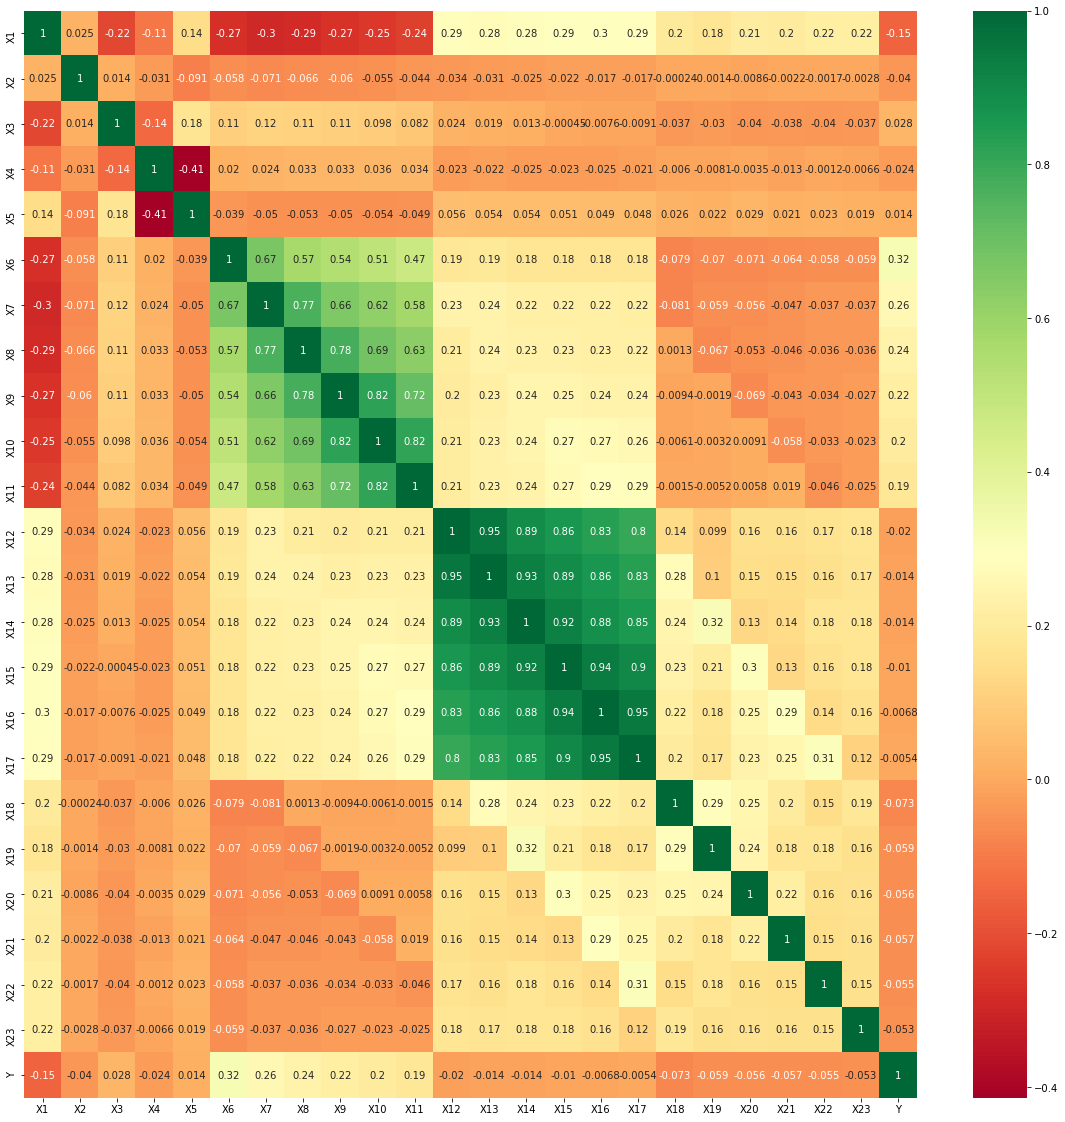

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
#get correlation of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#### Checking correlation 
From the result above we can see positive and negative correlation between each independent features &dependen feature. We check this whether each and every independent featues is useful for dependent feature.

Negative values mean tht features not that important features
we can see from diagram above important features are (give positive values) : X3,X5,X6,X7,X8,X9,X10,X11

## Spliting dataset into training and testing

In [9]:
# INDEPENDENCE & DEPENDENT FEATURES
X = df.drop('Y', axis=1).values
y = df['Y'].values

In [10]:
from sklearn.model_selection import train_test_split
 
#secara default train test data di bagi train 70% test 30%    
X_train,X_test, y_train,y_test= train_test_split(X,y,test_size=0.3, #test 30%
                stratify=y)

## Building Models

* Linear Regression
* Logistic Regression
* kNN
* SVM
* Naive Bayes 
* Linear Discriminan
* Gradient Boosting Classifier
* Decision Tree
* Xgboost

### 1. Linear Regression

In [11]:
#Mean X and mean Y
X_lin = df['X1'].values
y_lin = df['X12'].values

In [12]:
mean_x = np.mean(X_lin)
mean_y = np.mean(y_lin)

#Total
m = len(X_lin)

#calculate b1 and b0
number = 0
denom = 0
for i in range(m):
    number += (X_lin[i] - mean_x)* (y_lin[i]-mean_y)
    denom += (X_lin[i] - mean_x)** 2
b1 = number / denom
b0 = mean_y - (b1 * mean_x)

#print coef
print(b1,b0)

0.16199038569777965 24092.48087289529


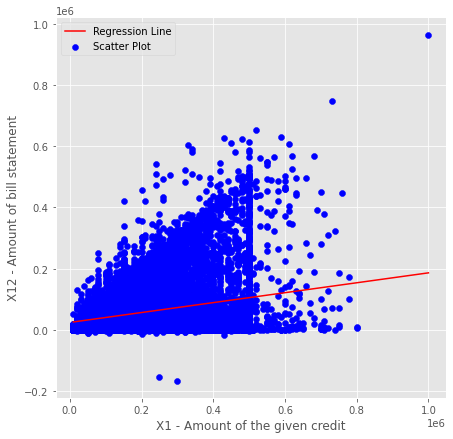

In [13]:
#Plotting value & Regression Line
max_x = np.max(X_lin) + 100
min_x = np.min(X_lin) - 100

#calculate line value x & y
x1 = np.linspace(min_x, max_x, 1000)
y1 = b0 + b1 * x1

plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

#Ploting line
plt.plot(x1,y1,color='red', label='Regression Line')


#Plot Scatter points
plt.scatter(X_lin, y_lin, c='blue', label='Scatter Plot')

plt.xlabel('X1 - Amount of the given credit')
plt.ylabel('X12 - Amount of bill statement')
plt.legend()
plt.show()

From this graph above we can see x:X1 (Amount of the given credit) , y : X12 (amount of bill statement in September, 2005).
        the amount of bill increases in september 2005 respect to the number of credits extended.

In [14]:
ss_t = 0
ss_r = 0
for i in range(m):
    y_predReg = b0 + b1 * X_lin[i]
    ss_t += (y_lin[i]- mean_y)** 2
    ss_r += (y_lin[i]- y_predReg)** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.08147020781391412


In [15]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('classic')
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,classification_report, confusion_matrix

reg = LinearRegression()
reg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
      .format(reg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
      .format(reg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.12
Accuracy of Logistic regression classifier on test set: 0.13


In [16]:
# Show Coefficent and Intercept
print('Coefficient = ', reg.coef_)
print('Intercept =', reg.intercept_)

Coefficient =  [-9.88089539e-08 -1.63534954e-02 -1.61037950e-02 -2.07116740e-02
  1.49500665e-03  9.65762803e-02  2.11892549e-02  9.47863309e-03
  1.90892147e-03  7.61970280e-03 -2.33792876e-03 -5.68885342e-07
 -2.64014092e-08  1.37689021e-07 -1.14448507e-07 -5.39666983e-09
  1.98762327e-07 -7.26814849e-07 -3.86525490e-07  1.65347119e-08
 -4.86395889e-07 -2.67191568e-07 -2.33329852e-08]
Intercept = 0.3123178617287227


In [17]:
reg.score(X_test,y_test)

0.12742396552820068

In [18]:
y_predictReg = reg.predict(X_test)

In [19]:
y_predictReg

array([0.23142096, 0.2033401 , 0.19385311, ..., 0.17906777, 0.07306502,
       0.23560139])

### 2. LOGISTIC REGRESSION

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
      .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
      .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.78
Accuracy of Logistic regression classifier on test set: 0.78


In [21]:
logreg.score(X_test,y_test)

0.7786666666666666

Confusion matrix
[[7008    1]
 [1991    0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7009
           1       0.00      0.00      0.00      1991

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.68      9000

Accuracy of Logistic Regression classifier on training set: 0.78
Accuracy of Logistic Regression classifier on test set: 0.78


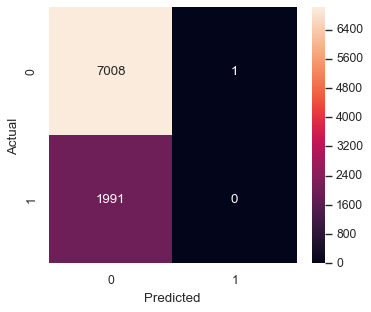

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7009
           1       0.00      0.00      0.00      1991

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.68      9000



In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Plot confusion matrix
print('Confusion matrix')
pred = logreg.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

plt.figure(figsize=(5, 4))
cf_mat = confusion_matrix(y_test, pred)
sns.heatmap(cf_mat, annot=True,fmt='g')

logreg.fit(X_train, y_train)
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))


plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(classification_report(y_test, pred))

### 3. kNN ( K-Nearest Neighbors)

#### Feature Scalling - Normalization

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [24]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [25]:
import math
math.sqrt(len(y_test))

94.86832980505137

In [26]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

# Create a k-NN classifier with 93 neighbors
#Define model:Init K-NN (94-1)
knn = KNeighborsClassifier(n_neighbors=93,p=2,metric='euclidean')
knn.fit(X_train, y_train)
# Fit the classifier to the data
knn.fit(X,y)

Accuracy of K-NN classifier on training set: 0.84
Accuracy of K-NN classifier on test set: 0.79


KNeighborsClassifier(metric='euclidean', n_neighbors=93)

In [27]:
knn.score(X_test,y_test)

0.2212222222222222

Confusion matrix
[[   0 7009]
 [   0 1991]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7009
           1       0.22      1.00      0.36      1991

    accuracy                           0.22      9000
   macro avg       0.11      0.50      0.18      9000
weighted avg       0.05      0.22      0.08      9000



/Users/bqdesy/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


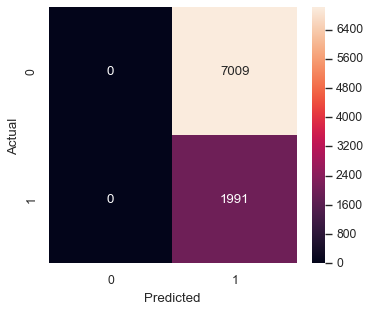

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7009
           1       0.22      1.00      0.36      1991

    accuracy                           0.22      9000
   macro avg       0.11      0.50      0.18      9000
weighted avg       0.05      0.22      0.08      9000



In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Evaluate Model
# Plot confusion matrix
print('Confusion matrix')
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

plt.figure(figsize=(5, 4))
cf_mat = confusion_matrix(y_test, pred)
sns.heatmap(cf_mat, annot=True,fmt='g')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(classification_report(y_test, pred))

In [29]:
print(f1_score(y_test,pred))

0.3622964243471931


In [30]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

0.2212222222222222


### 4. SVM ( Support Vector Machine)

In [31]:
len(X_train)

21000

In [32]:
len(X_test)

9000

In [33]:
from sklearn.svm import SVC

svm = SVC(C=10,gamma=1,degree=3, random_state=50, shrinking=True,verbose=False)
svm.fit(X_train, y_train)

SVC(C=10, gamma=1, random_state=50)

Accuracy of SVM classifier on training set: 0.97
Accuracy of SVM classifier on test set: 0.77
Confusion matrix
[[6486  523]
 [1568  423]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.86      7009
           1       0.45      0.21      0.29      1991

    accuracy                           0.77      9000
   macro avg       0.63      0.57      0.57      9000
weighted avg       0.73      0.77      0.73      9000



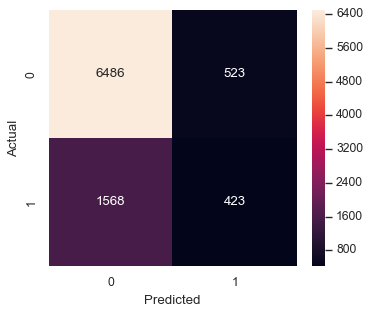

              precision    recall  f1-score   support

           0       0.81      0.93      0.86      7009
           1       0.45      0.21      0.29      1991

    accuracy                           0.77      9000
   macro avg       0.63      0.57      0.57      9000
weighted avg       0.73      0.77      0.73      9000



In [34]:
#Model Score
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

# Plot confusion matrix
print('Confusion matrix')
predSVM = svm.predict(X_test)
print(confusion_matrix(y_test, predSVM))
print(classification_report(y_test, predSVM))

plt.figure(figsize=(5, 4))
cf_mat = confusion_matrix(y_test, predSVM)
sns.heatmap(cf_mat, annot=True,fmt='d')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(classification_report(y_test, predSVM))

In [35]:
print(f1_score(y_test,predSVM))

0.2880490296220633


In [36]:
print(accuracy_score(y_test,predSVM))

0.7676666666666667


### 5. Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

Accuracy of GNB classifier on training set: 0.74
Accuracy of GNB classifier on test set: 0.74
Confusion matrix
[[5445 1564]
 [ 767 1224]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.82      7009
           1       0.44      0.61      0.51      1991

    accuracy                           0.74      9000
   macro avg       0.66      0.70      0.67      9000
weighted avg       0.78      0.74      0.75      9000



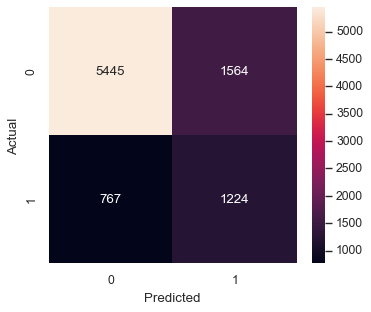

              precision    recall  f1-score   support

           0       0.88      0.78      0.82      7009
           1       0.44      0.61      0.51      1991

    accuracy                           0.74      9000
   macro avg       0.66      0.70      0.67      9000
weighted avg       0.78      0.74      0.75      9000



In [38]:
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

# Plot confusion matrix
print('Confusion matrix')
predgnb = gnb.predict(X_test)
print(confusion_matrix(y_test, predgnb))
print(classification_report(y_test, predgnb))

plt.figure(figsize=(5, 4))
cf_mat = confusion_matrix(y_test, predgnb)
sns.heatmap(cf_mat, annot=True,fmt='g')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(classification_report(y_test, predgnb))

In [39]:
print(f1_score(y_test,predgnb))

0.512241054613936


In [40]:
print(accuracy_score(y_test,predgnb))

0.741


### 5. Linear Discriminant Analysis

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.81
Accuracy of LDA classifier on test set: 0.81


[[6779  230]
 [1469  522]]


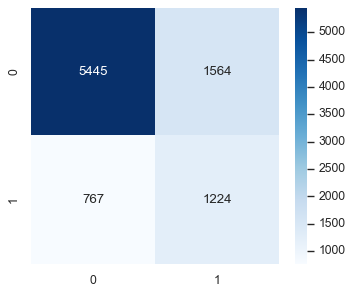

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7009
           1       0.69      0.26      0.38      1991

    accuracy                           0.81      9000
   macro avg       0.76      0.61      0.63      9000
weighted avg       0.79      0.81      0.78      9000



In [42]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = lda.predict(X_test)
plt.figure(figsize=(5, 4))
print(confusion_matrix(y_test, pred))
sns.heatmap(cf_mat, annot=True,fmt='g',cmap="Blues")
plt.show()
print(classification_report(y_test, pred))

### 6. Gradient boosting

In [43]:
#Load Gradient boosting from sklearn
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
GB_classifier = GradientBoostingClassifier()
GB_classifier.fit(X_train,y_train)

GradientBoostingClassifier()

In [45]:
print('Accuracy of Gradeint Boosting classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of Gradeint Boosting classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of Gradeint Boosting classifier on training set: 0.81
Accuracy of Gradeint Boosting classifier on test set: 0.81


Confusion matrix
[[6647  362]
 [1231  760]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.68      0.38      0.49      1991

    accuracy                           0.82      9000
   macro avg       0.76      0.67      0.69      9000
weighted avg       0.81      0.82      0.80      9000



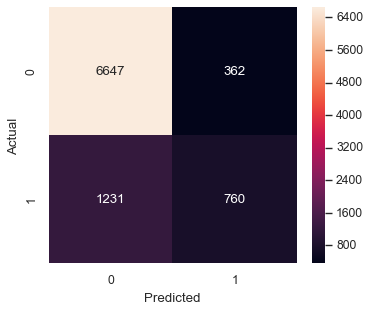

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.68      0.38      0.49      1991

    accuracy                           0.82      9000
   macro avg       0.76      0.67      0.69      9000
weighted avg       0.81      0.82      0.80      9000



In [46]:
# Plot confusion matrix
print('Confusion matrix')
pred = GB_classifier.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

plt.figure(figsize=(5, 4))
cf_mat = confusion_matrix(y_test, pred)
sns.heatmap(cf_mat, annot=True,fmt='g')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(classification_report(y_test, pred))

In [47]:
y_predictionGB =GB_classifier.predict(X_test)

In [48]:
y_predictionGB

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
#Accuracy Score
from sklearn.metrics import accuracy_score

print("Accuracy of Model:", accuracy_score(y_test,y_predictionGB))

Accuracy of Model: 0.823


#### We see from this data above we get accuracy 82,3 %

### 7. Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dTree_clf = DecisionTreeClassifier()

In [52]:
dTree_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [53]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dTree_clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dTree_clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.73


Confusion matrix
[[5722 1287]
 [1176  815]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      7009
           1       0.39      0.41      0.40      1991

    accuracy                           0.73      9000
   macro avg       0.61      0.61      0.61      9000
weighted avg       0.73      0.73      0.73      9000



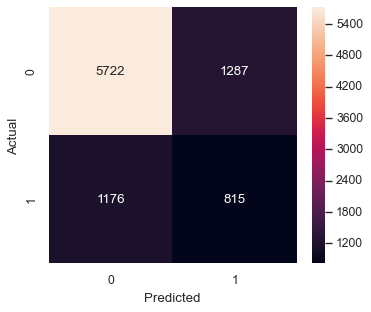

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      7009
           1       0.39      0.41      0.40      1991

    accuracy                           0.73      9000
   macro avg       0.61      0.61      0.61      9000
weighted avg       0.73      0.73      0.73      9000



In [54]:
# Plot confusion matrix
print('Confusion matrix')
pred = dTree_clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

plt.figure(figsize=(5, 4))
cf_mat = confusion_matrix(y_test, pred)
sns.heatmap(cf_mat, annot=True,fmt='g')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(classification_report(y_test, pred))

In [55]:
#Prediction
y_predictTree = dTree_clf.predict(X_test)
y_predictTree

array([0, 0, 0, ..., 1, 0, 1])

In [56]:
print("Accuracy of Model:", accuracy_score(y_test,y_predictTree))

Accuracy of Model: 0.7263333333333334


### 7.1 Decision Tree with max_depth=6, Random state 50

Accuracy of Decision Tree classifier on training set: 0.82
Accuracy of Decision Tree classifier on test set: 0.82
Confusion matrix
[[6603  406]
 [1219  772]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7009
           1       0.66      0.39      0.49      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.69      9000
weighted avg       0.80      0.82      0.80      9000



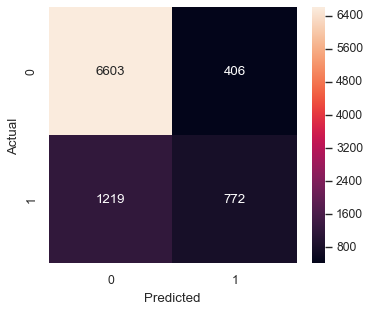

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7009
           1       0.66      0.39      0.49      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.69      9000
weighted avg       0.80      0.82      0.80      9000



In [57]:
# Function to perform training with max_depth=6, Random state 50
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

dTree_clf1 = DecisionTreeClassifier(max_depth=6, max_leaf_nodes=18, random_state=50)
dTree_clf1.fit(X_train,y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dTree_clf1.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dTree_clf1.score(X_test, y_test)))

# Plot confusion matrix
print('Confusion matrix')
y_predictTree1 = dTree_clf1.predict(X_test)
print(confusion_matrix(y_test, y_predictTree1))
print(classification_report(y_test, y_predictTree1))

plt.figure(figsize=(5, 4))
cf_mat = confusion_matrix(y_test, y_predictTree1)
sns.heatmap(cf_mat, annot=True,fmt='g')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(classification_report(y_test, y_predictTree1))

### 7.2 Decision Tree with entropy,max_depth=6, Random state 100

Accuracy of Decision Tree classifier on training set: 0.74
Accuracy of Decision Tree classifier on test set: 0.74
Confusion matrix
[[6667  342]
 [1304  687]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.67      0.35      0.45      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.67      9000
weighted avg       0.80      0.82      0.79      9000



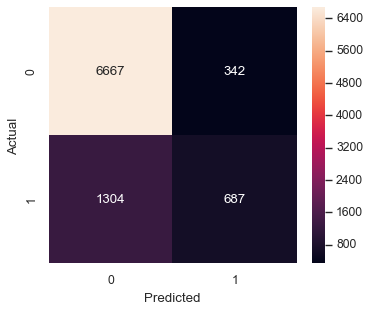

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.67      0.35      0.45      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.67      9000
weighted avg       0.80      0.82      0.79      9000



In [58]:
# Function to perform training with entropy
clf_entropy = DecisionTreeClassifier(criterion ="entropy",random_state=100,
    max_depth=6,min_samples_leaf=18)  
# Number of leaf : 3000 * 0.6 = 1800 so 1% of that will be at least our tree create 18 leafs
clf_entropy.fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

# Plot confusion matrix
print('Confusion matrix')
pred = clf_entropy.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

plt.figure(figsize=(5, 4))
cf_mat = confusion_matrix(y_test, pred)
sns.heatmap(cf_mat, annot=True,fmt='g')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(classification_report(y_test, pred))


### 8. XGboost

In [59]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier()

In [60]:
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
print('Accuracy of XGboost classifier on training set: {:.2f}'
     .format(xgb_classifier.score(X_train, y_train)))
print('Accuracy of XGboost classifier on test set: {:.2f}'
     .format(xgb_classifier.score(X_test, y_test)))

Accuracy of XGboost classifier on training set: 0.89
Accuracy of XGboost classifier on test set: 0.81


Confusion matrix
[[6589  420]
 [1254  737]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7009
           1       0.64      0.37      0.47      1991

    accuracy                           0.81      9000
   macro avg       0.74      0.66      0.68      9000
weighted avg       0.80      0.81      0.79      9000



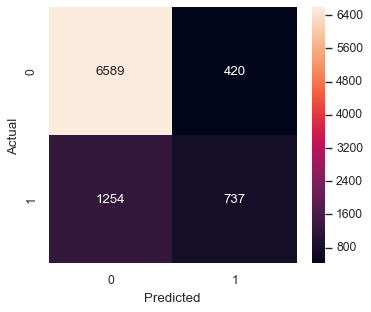

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.67      0.35      0.45      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.67      9000
weighted avg       0.80      0.82      0.79      9000



In [62]:
# Plot confusion matrix
print('Confusion matrix')
#Prediction
y_predictXGB = xgb_classifier.predict(X_test)
print(confusion_matrix(y_test, y_predictXGB))
print(classification_report(y_test, y_predictXGB))

plt.figure(figsize=(5, 4))
cf_mat = confusion_matrix(y_test, y_predictXGB)
sns.heatmap(cf_mat, annot=True,fmt='g')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(classification_report(y_test, pred))

In [63]:
print("Accuracy of Model XGBoost Classifier:", accuracy_score(y_test,y_predictXGB))

Accuracy of Model XGBoost Classifier: 0.814


##### We see from data above we get accuracy 81,4% for XGboost with depth 6

# AUC ( Area Under the Curve)

In [64]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

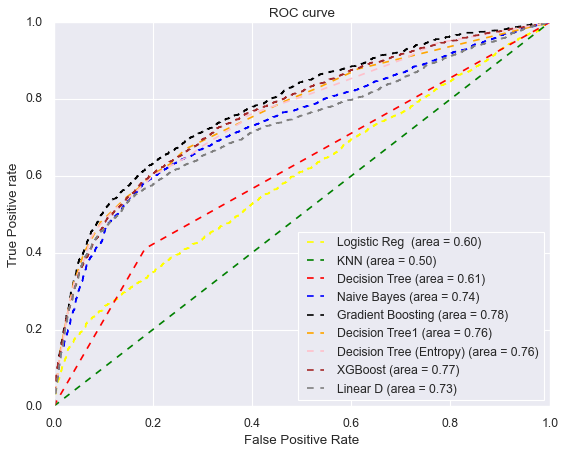

In [65]:
# predict probabilities
pred_prob1 = logreg.predict_proba(X_test)
pred_prob2 = knn.predict_proba(X_test)
pred_prob3 = dTree_clf.predict_proba(X_test) #Decision Tree
pred_prob4 = gnb.predict_proba(X_test)
pred_prob5 = GB_classifier.predict_proba(X_test) #Gradient Boosting
pred_prob6 = dTree_clf1.predict_proba(X_test) #DC T
pred_prob7 = clf_entropy.predict_proba(X_test)
pred_prob8 = xgb_classifier.predict_proba(X_test)
pred_prob9 = lda.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7[:,1], pos_label=1)
fpr8, tpr8, thresh8 = roc_curve(y_test, pred_prob8[:,1], pos_label=1)
fpr9, tpr9, thresh9 = roc_curve(y_test, pred_prob9[:,1], pos_label=1)


# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])
auc_score6 = roc_auc_score(y_test, pred_prob6[:,1])
auc_score7 = roc_auc_score(y_test, pred_prob7[:,1])
auc_score8 = roc_auc_score(y_test, pred_prob8[:,1])
auc_score9 = roc_auc_score(y_test, pred_prob9[:,1])



# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='yellow', label='Logistic Reg  (area = %0.2f)' % auc_score1)
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN (area = %0.2f)' % auc_score2)
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Decision Tree (area = %0.2f)' % auc_score3)
plt.plot(fpr4, tpr4, linestyle='--',color='blue', label='Naive Bayes (area = %0.2f)' % auc_score4)
plt.plot(fpr5, tpr5, linestyle='--',color='black', label='Gradient Boosting (area = %0.2f)' % auc_score5)
plt.plot(fpr6, tpr6, linestyle='--',color='orange', label='Decision Tree1 (area = %0.2f)' % auc_score6)
plt.plot(fpr7, tpr7, linestyle='--',color='pink', label='Decision Tree (Entropy) (area = %0.2f)' % auc_score7)
plt.plot(fpr8, tpr8, linestyle='--',color='brown', label='XGBoost (area = %0.2f)' % auc_score8)
plt.plot(fpr9, tpr9, linestyle='--',color='gray', label='Linear D (area = %0.2f)' % auc_score9)


# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()

### We compare : logistic regression , KNN, 3 Decision Tree,Naive Bayes, Gradeint boosting, XGboost and Linear Discriminant
We can conclude that 
As we can see from ROC curves of 9th models are quite significantly different. 

* We got higest AUC for Gradient Boosting = 0.78
* The lowest AUC for this case is KNN = 0.50
#### So we can say taht the best model for this case is Gradient boosting . Even it's so, we still believe that hyperparameters have effected big enough to the accuracy of the model in circumstance situation

### Now Let's clasify credit card by users from age category

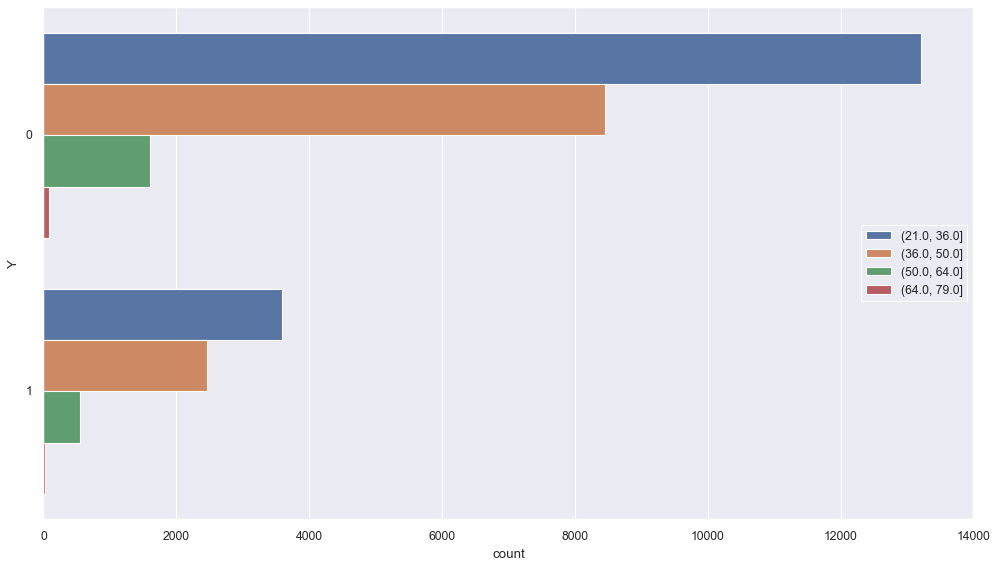

In [66]:
# Categorizing of Age into 4 categories

df['X5']= pd.cut(df['X5'], bins=4, precision=0) 
plt.figure(figsize=(15,8))
sns.countplot(y='Y', hue='X5', data = df)
plt.legend(loc = 'center right')

##### From the Graph above we can say that most of customers who are using credit card is in Age between 21 - 36 year old is dominant among other age categories.

In [67]:
print(df.shape)
df.X5
# Group data by gender
df_example1 = df.groupby(by = 'X5').agg({'X5': 'count'})

display (df_example1)

(30000, 24)


,X5
X5,
"(21.0, 36.0]",16809
"(36.0, 50.0]",10922
"(50.0, 64.0]",2159
"(64.0, 79.0]",110


Y  X3
0  2     10700
   1      8549
   3      3680
   5       262
   4       116
   6        43
   0        14
1  2      3330
   1      2036
   3      1237
   5        18
   6         8
   4         7
Name: X3, dtype: int64

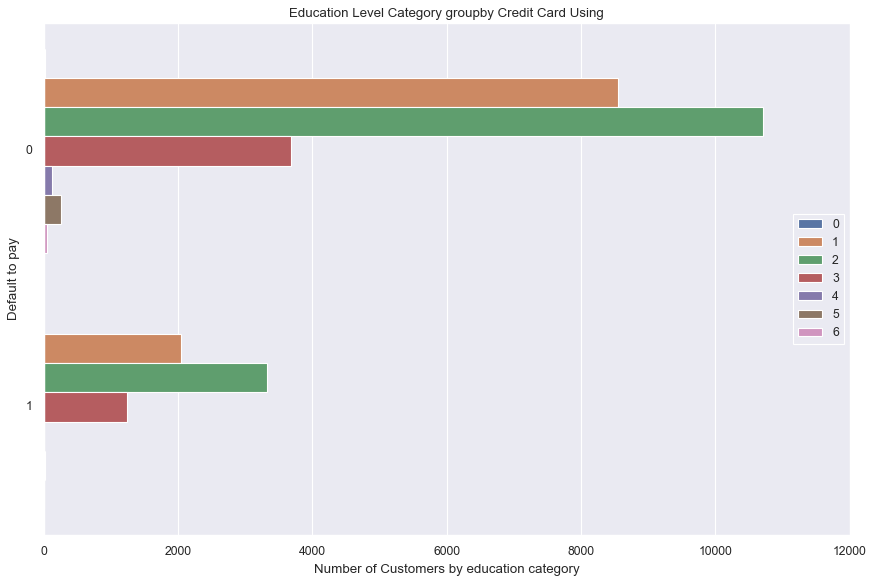

In [68]:
# Bar chart Education groupby Y (default to pay)
plt.figure(figsize=(13,8))
sns.countplot(y='Y', hue='X3', data = df)
plt.legend(loc = 'center right')
plt.xlabel('Number of Customers by education category')
plt.ylabel('Default to pay')
plt.title('Education Level Category groupby Credit Card Using')

# Table Education group by Y
df.groupby('Y')['X3'].value_counts()

#### X3 = Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

Based on some the result of graphs above, we can say that most customers using credit card is in category 2 (University Student - green bar on the Bar Chart), following with (Graduate Student) as second rank on using credit card (Orange colour on Bar Chart).